In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data_benin = pd.read_csv('../data/benin-malanville.csv')

In [5]:
data_benin.head(5)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [6]:
data_sierra = pd.read_csv('../data/sierraleone-bumbuna.csv')

In [7]:
data_sierra.head(5)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [8]:
data_togo = pd.read_csv('../data/togo-dapaong_qc.csv')

In [9]:
data_togo.head(5)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [10]:
data_benin.shape

(525600, 19)

# About the 3 csv files 
- They show similar patterns while plotting all numerical features while checking the data.
- So that we will summarise the data and doing the EDA after joining the three data's. 

In [11]:
data_benin['Country'] = 'Benin'
data_togo['Country'] = 'Togo'
data_sierra['Country'] = 'Sierra Leone'


In [12]:
# Combine all three DataFrames into one
data = pd.concat([data_benin, data_togo, data_sierra], ignore_index=True)

In [17]:
data = data.drop('Comments', axis = 1)

In [18]:
data.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06
mean,2.243573e+02,1.449408e+02,1.151746e+02,2.231257e+02,2.155223e+02,2.741696e+01,6.298333e+01,1.878440e+00,2.576763e+00,4.649840e-01,1.494072e+02,8.771398e+00,9.899963e+02,8.079655e-04,2.697615e-03,3.339823e+01,3.286939e+01
std,3.181073e+02,2.453781e+02,1.580602e+02,3.154732e+02,3.049439e+02,5.131024e+00,2.854366e+01,1.536357e+00,1.961275e+00,2.904002e-01,1.039399e+02,6.790689e+00,1.046797e+01,2.841326e-02,3.803610e-02,1.290953e+01,1.238889e+01
min,-1.950000e+01,-7.800000e+00,-1.790000e+01,0.000000e+00,0.000000e+00,1.100000e+01,2.100000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.680000e+02,0.000000e+00,0.000000e+00,9.000000e+00,8.100000e+00
25%,-2.200000e+00,-2.000000e-01,-1.400000e+00,0.000000e+00,0.000000e+00,2.370000e+01,3.860000e+01,6.000000e-01,1.100000e+00,4.000000e-01,5.330000e+01,2.900000e+00,9.770000e+02,0.000000e+00,0.000000e+00,2.370000e+01,2.370000e+01
50%,1.200000e+00,0.000000e+00,1.400000e+00,4.100000e+00,4.000000e+00,2.680000e+01,6.900000e+01,1.800000e+00,2.400000e+00,5.000000e-01,1.803000e+02,9.000000e+00,9.940000e+02,0.000000e+00,0.000000e+00,2.830000e+01,2.800000e+01
75%,4.244000e+02,2.270000e+02,2.190000e+02,4.111000e+02,3.973000e+02,3.100000e+01,8.860000e+01,2.800000e+00,3.600000e+00,6.000000e-01,2.342000e+02,1.290000e+01,9.990000e+02,0.000000e+00,0.000000e+00,4.260000e+01,4.190000e+01
max,1.499000e+03,1.004500e+03,8.920000e+02,1.507000e+03,1.473000e+03,4.380000e+01,1.000000e+02,1.950000e+01,2.660000e+01,4.700000e+00,3.600000e+02,9.940000e+01,1.006000e+03,1.000000e+00,2.500000e+00,8.100000e+01,9.460000e+01


## Statistical Summary of the Solar Radiation Measurement Data

The table above provides a statistical summary of the numerical columns in the dataset, including key metrics such as count, mean, standard deviation, minimum, maximum, and quartile values. This summary helps us understand the distribution and range of each variable.

### key insights from the Summary Statistics:

1. **Range and Variability**:
   - The GHI values have a wide range from -19.50 W/m² to 1,499.00 W/m², with significant variability, as indicated by the high standard deviation. The negative values in GHI suggest data quality issues or measurement errors.
   - The temperature and humidity also show a considerable range, reflecting varying weather conditions.

2. **Central Tendency (The 50 percntiles)**:
   - The median values for GHI, DNI, DHI, Tamb, and RH are close to their respective means, indicating a fairly symmetrical distribution for these variables, though the presence of outliers might skew the analysis.

3. **Distribution**:
   - The quartile values provide insight into the spread of the data. For example, GHI and DNI have a large interquartile range (between 25% and 50%), indicating significant variability in solar radiation.

4. **Outliers**:
   - Extreme values, such as negative GHI and DNI readings, should be investigated further. These could be due to sensor errors or specific conditions that need to be understood better.

This statistical summary serves as a foundation for further exploratory data analysis (EDA) by highlighting key characteristics and potential areas for deeper investigation, such as outliers, skewed distributions, and relationships between variables.


In [20]:
# Selecting numerical columns only (excluding 'Timestamp' and any non-numerical columns)
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data_numerical = data[numerical_columns]


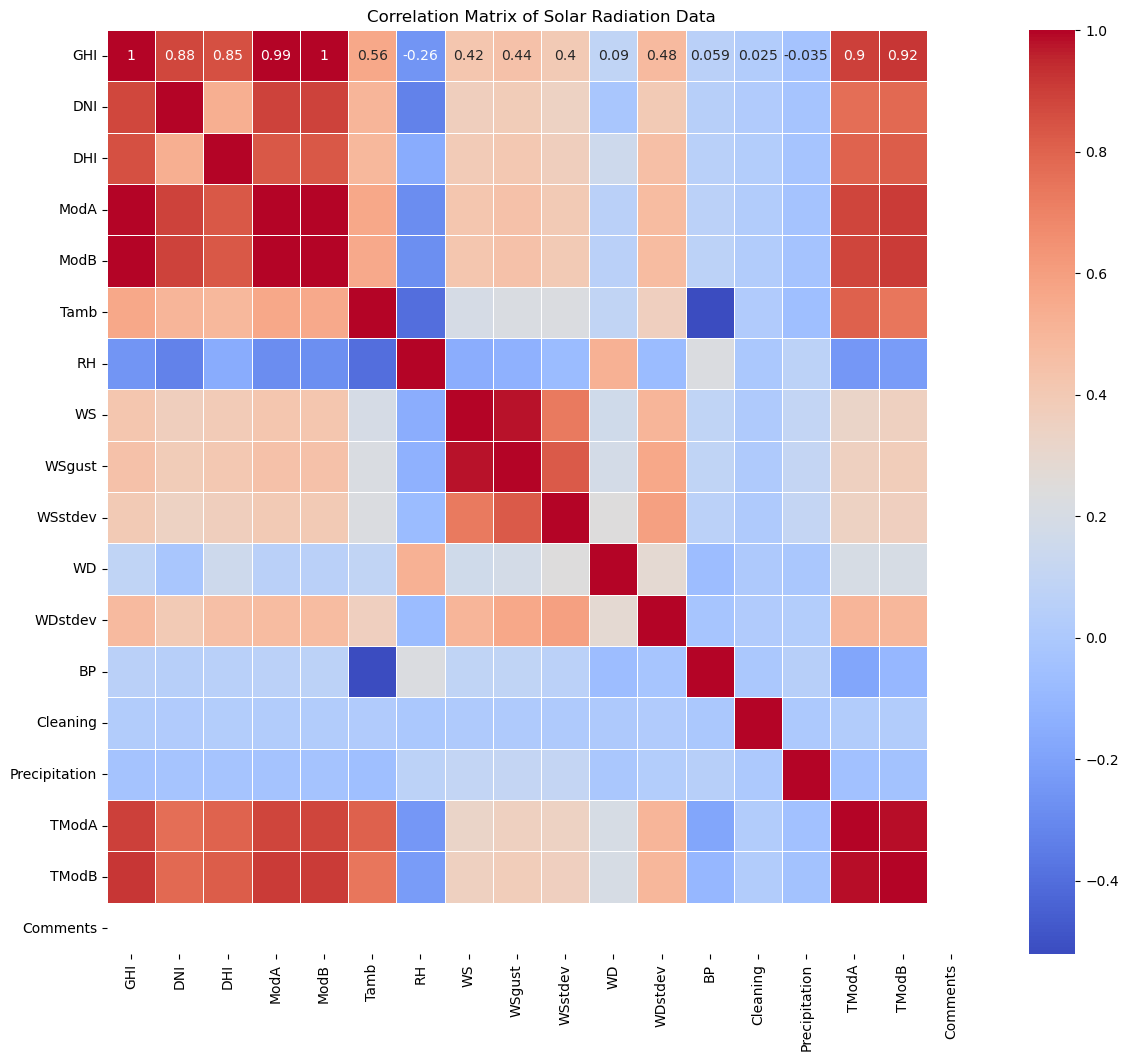

In [25]:
# Calculate the correlation matrix
corr_matrix = data_togo_numerical.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Solar Radiation Data')
plt.show()

### Insights from Correlation Analysis

1. **Positive Correlations**:
   - The variables `'GHI'`, `'DNI'`, `'DHI'`, `'ModA'`, `'ModB'`, `'Tamb'`, `'TModA'`, and `'TModB'` show significant positive correlations with each other. This is expected as these variables are all related to solar radiation and temperature, which tend to increase together.

2. **Negative Correlation with `'RH'`**:
   - `'RH'` (Relative Humidity) is fairly negatively correlated with all other variables. This suggests that higher solar radiation and temperature are associated with lower humidity, which is typical in clear, sunny conditions.

3. **High Correlation between `'TModA'` and `'TModB'`**:
   - `'TModA'` and `'TModB'` have a correlation close to 1, indicating they likely measure similar conditions, possibly due to their proximity or identical setup.

4. **Perfect Correlation between `'GHI'` and `'ModB'`**:
   - The correlation of 1 between `'GHI'` and `'ModB'` suggests that `'ModB'` may be directly measuring `'GHI'` or a closely related variable.


## Data Quality Check 